#Task:
Mixture of Gaussian, EM-Algorithm
<br>
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets: 

In [1]:
import numpy as np
from __future__ import print_function
%matplotlib inline

###Dataset 1

In [2]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data1 = data[1:, :]

##Dataset 2

In [3]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  #[3.0, 2.6],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
        np.random.multivariate_normal(means[i], covariances[i],
                                            size=factor * amplitudes[i])])
data2 = data[1:, :]

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

# Results
The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">

In [31]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch

Visualizing Dataset1 and fitted mixture components..


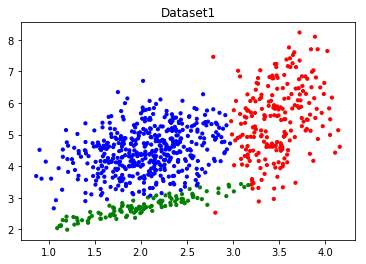

Visualizing Dataset2 and fitted mixture components..


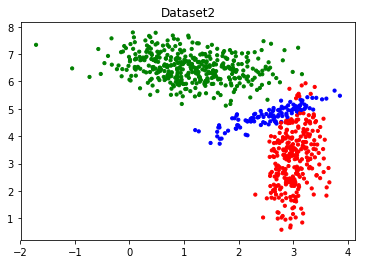

In [83]:
class GaussianMixture():
    def __init__(self):
        pass
    
    def set_color(self, labels):
        color_dict = {0: 'g', 1: 'r', 2: 'b'}
        return [color_dict[l] for l in labels]
    
    def GausModMix(self, n_comp, rand_state, data, title= None):
        gmm = GMM(n_components=n_comp, random_state=rand_state).fit(data)
        labels = gmm.predict(data)
        
        plt.scatter(data[:,0],data[:,1],c = self.set_color(labels), s = 10)
        plt.title(title)
        plt.show()
        return gmm
    
    def draw_ellipse(self, position, covariance, alpha):
        """Draw an ellipse with a given position and covariance"""
        ax = plt.gca()

        # Convert covariance to principal axes
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)

        # Draw the Ellipse
        for nsig in range(1, 2):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, 
                                 fill=False, linewidth=3))
        
    def plot_gmm(self, gmm, X, label=True, ax=None, title= None):
        ax = plt.gca()
        labels = gmm.fit(X).predict(X)
        
        if label:
            ax.scatter(X[:, 0], X[:, 1], c=self.set_color(labels), s=10, zorder=1)
        else:
            ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
            
        w_factor = 0.2 / gmm.weights_.max()
        plt.title(title)
        #plt.scatter()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            self.draw_ellipse(pos, covar, alpha=w * w_factor)

gm_obj = GaussianMixture()
print ('Visualizing Dataset1 and fitted mixture components..')
gmm1 = gm_obj.GausModMix(3, 40, data1, title= 'Dataset1')
print ('Visualizing Dataset2 and fitted mixture components..')
gmm2 = gm_obj.GausModMix(3, 40, data2, title= 'Dataset2')

Dataset1: Plotting ellipsoids for Gaussians...


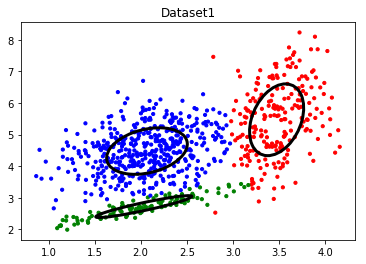

In [84]:
print ('Dataset1: Plotting ellipsoids for Gaussians...')
gm_obj.plot_gmm(gmm1, data1, title= 'Dataset1')

Dataset2: Plotting ellipsoids for Gaussians...


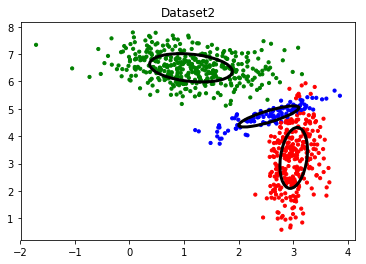

In [85]:
print ('Dataset2: Plotting ellipsoids for Gaussians...')
gm_obj.plot_gmm(gmm2, data2, title= 'Dataset2')

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html